<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li></ul></li><li><span><a href="#Intraday" data-toc-modified-id="Intraday-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intraday</a></span></li><li><span><a href="#Balancing" data-toc-modified-id="Balancing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Balancing</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison</a></span><ul class="toc-item"><li><span><a href="#Plot-differences" data-toc-modified-id="Plot-differences-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot differences</a></span></li></ul></li><li><span><a href="#Demand-Patterns" data-toc-modified-id="Demand-Patterns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Demand Patterns</a></span><ul class="toc-item"><li><span><a href="#Yearly-rental-patterns" data-toc-modified-id="Yearly-rental-patterns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Yearly rental patterns</a></span></li><li><span><a href="#Weekly-Pattern-of-connected-EVS" data-toc-modified-id="Weekly-Pattern-of-connected-EVS-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Weekly Pattern of connected EVS</a></span></li><li><span><a href="#Daily-Pattern-of-connected-EVS" data-toc-modified-id="Daily-Pattern-of-connected-EVS-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Daily Pattern of connected EVS</a></span></li><li><span><a href="#2.4.-Average-Daily-Pattern" data-toc-modified-id="2.4.-Average-Daily-Pattern-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>2.4. Average Daily Pattern</a></span></li></ul></li></ul></div>

## Imports and Data loading

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [13]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import load_car2go_trips, load_car2go_capacity

# Intraday

In [15]:
df_i = pd.read_csv("../logs/stats-intraday.csv")
df_i["timestamp"] = df_i["timestamp"].apply(lambda x : datetime.fromtimestamp(x))
df_i = df_i.set_index("timestamp")
df_i.tail()

,fleet,fleet_soc,ev_vpp,vpp_soc,vpp_capacity_kw,vpp_charged_kw,balance_eur,imbalance_kw
timestamp,,,,,,,,
2017-04-30 23:30:00,495,68.13,31,66.25,111.6,1256115.6,24069.94,0
2017-04-30 23:35:00,495,68.20,32,67.35,115.2,1256227.2,24069.94,0
2017-04-30 23:40:00,495,68.26,31,68.00,111.6,1256338.8,24069.94,0
2017-04-30 23:45:00,495,68.30,33,66.27,118.8,1256450.4,24069.94,0
2017-04-30 23:50:00,495,68.38,34,66.91,122.4,1256569.2,24069.94,0


# Balancing

In [14]:
df_b = pd.read_csv("../logs/stats-balancing.csv")
df_b["timestamp"] = df_b["timestamp"].apply(lambda x : datetime.fromtimestamp(x))
df_b = df_b.set_index("timestamp")
df_b.tail()

,fleet,fleet_soc,ev_vpp,vpp_soc,vpp_capacity_kw,vpp_charged_kw,balance_eur,imbalance_kw
timestamp,,,,,,,,
2017-04-30 23:30:00,495,68.13,31,66.25,111.6,1460793.6,31190.17,0
2017-04-30 23:35:00,495,68.20,32,67.35,115.2,1460905.2,31190.17,0
2017-04-30 23:40:00,495,68.26,31,68.00,111.6,1461016.8,31190.17,0
2017-04-30 23:45:00,495,68.30,33,66.27,118.8,1461128.4,31190.17,0
2017-04-30 23:50:00,495,68.38,34,66.91,122.4,1461247.2,31190.17,0


# Comparison

## Plot differences

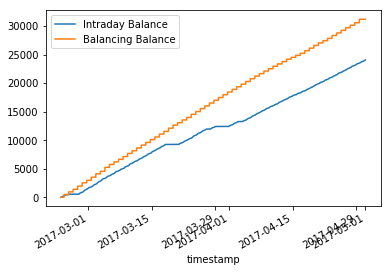

In [21]:
merge = df_i.merge(df_b, left_index=True, right_index=True, how='left')
ax = merge.plot(y='balance_eur_x', label='Intraday Balance')
merge.plot(y='balance_eur_y', label='Balancing Balance', ax=ax)
plt.show()

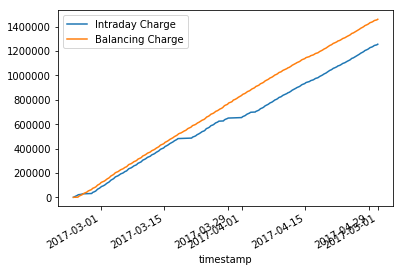

In [22]:
merge = df_i.merge(df_b, left_index=True, right_index=True, how='left')
ax = merge.plot(y='vpp_charged_kw_x', label='Intraday Charge')
merge.plot(y='vpp_charged_kw_y', label='Balancing Charge', ax=ax)
plt.show()

# Demand Patterns

In [7]:
def apply_smoother(df, days):
    DAY = 12*24

    df['vpp_avg'] = df['ev_vpp'].rolling(
        window=int(days*DAY)).mean()
    df['vpp_soc_avg'] = df['vpp_soc'].rolling(
        window=int(days*DAY)).mean()
    df['vpp_capacity_kw_avg'] = df['vpp_capacity_kw'].rolling(
        window=int(days*DAY)).mean()

    return df


def plot(df, title, start="2016-12-1", end="2017-04-28"):
    X = df.loc[start:end][['vpp_avg', 'vpp_soc_avg', 'vpp_capacity_kw_avg']]
    return X.plot(figsize=(12, 4), title=title)

## Yearly rental patterns

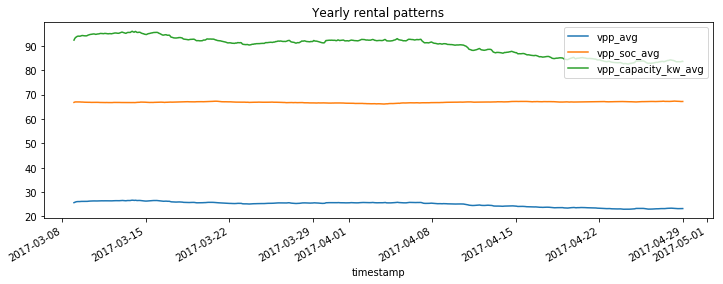

In [8]:
df = apply_smoother(df, days=14)
plot(df, "Yearly rental patterns");

## Weekly Pattern of connected EVS

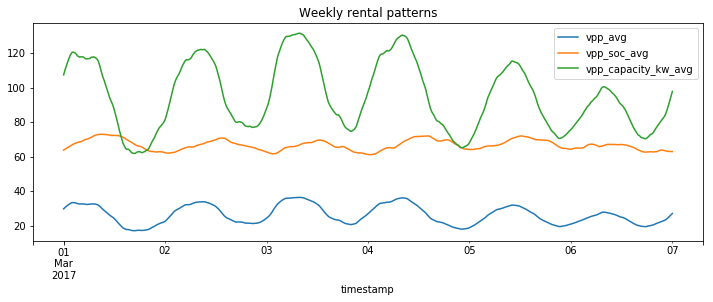

In [9]:
df = apply_smoother(df, days=0.5)
plot(df, "Weekly rental patterns", start=datetime(
    2017, 3, 1), end=datetime(2017, 3, 7));

## Daily Pattern of connected EVS

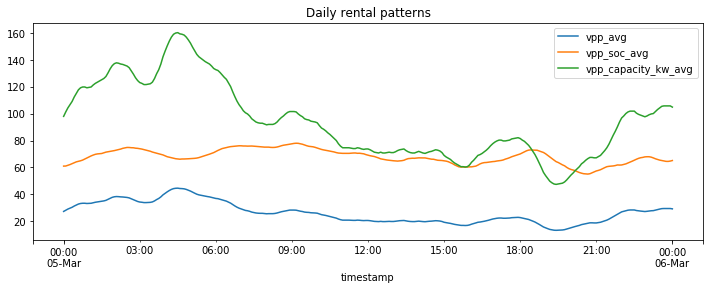

In [10]:
df = apply_smoother(df, days=1/24)
plot(df, "Daily rental patterns", start=datetime(
    2017, 3, 5), end=datetime(2017, 3, 6));

## 2.4. Average Daily Pattern

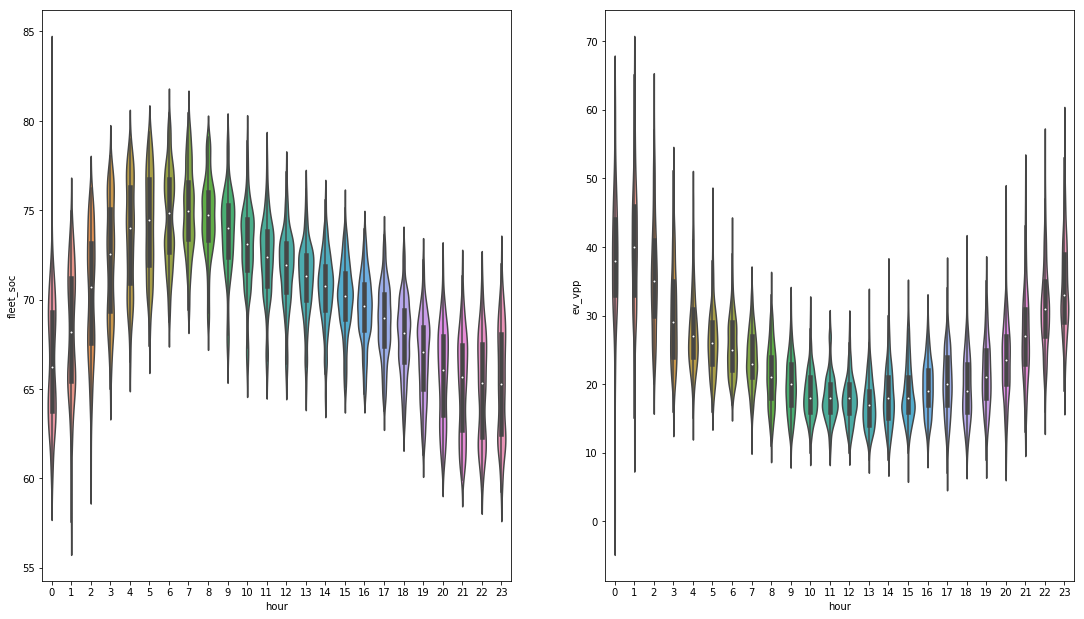

In [11]:
df["hour"] = df.index.hour

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 10.5)
sns.violinplot(x="hour", y="fleet_soc", data=df, ax=ax1)
sns.violinplot(x="hour", y="ev_vpp", data=df, ax=ax2);